## El tratamiento de las variables categoricas

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv(r"C:\Users\Asus\Desktop\Datasets\datasets\ecom-expense\Ecom Expense.csv")

In [4]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [5]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")

In [6]:
dummy_citytier = pd.get_dummies(df["City Tier"], prefix= "City")

In [7]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [8]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [9]:
df_new= df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend',
 'Gender_Female',
 'Gender_Male']

In [10]:
df_new= df_new[column_names].join(dummy_citytier)
column_names = df_new.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend',
 'Gender_Female',
 'Gender_Male',
 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3']

In [11]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [12]:
feature_cols = ["Monthly Income","Transaction Time","Gender_Female","Gender_Male","City_Tier 1","City_Tier 2","City_Tier 3"
               ,"Record"]

In [13]:
x = df_new[feature_cols]
y=df_new["Total Spend"]

In [14]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030137089
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [16]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205735),
 ('Transaction Time', 0.1549461254958957),
 ('Gender_Female', -131.02501325554607),
 ('Gender_Male', 131.0250132555461),
 ('City_Tier 1', 76.7643260104954),
 ('City_Tier 2', 55.13897430923231),
 ('City_Tier 3', -131.90330031972783),
 ('Record', 772.2334457445644)]

In [17]:
## si sumamos city tiers y gender, da 0!

In [18]:
lm.score(x,y)

0.9179923586131016

In [19]:
#Muybajo

El modelo puede ser escrito como:

 *Total Spend = Monthly Income*0.14753898049205735 + Transaction Time*0.1549461254958957 + Gender_Female*-131.02501325554607
+ Gender_Male*131.0250132555461 + City_Tier 1*76.7643260104954 + City_Tier 2*55.13897430923231 + City_Tier 3*-131.90330031972783 + Record*772.2334457445644 + -79.41713030137089


* Si es hombre y vive en city tier 1 = Monthly Income*0.14753898049205735 + Transaction Time*0.1549461254958957 + 131.0250132555461 + City_Tier 1*76.7643260104954 + Record*772.2334457445644 + -79.41713030137089


* Si es hombe y vive en city tier 2 =  Monthly Income*0.14753898049205735 + Transaction Time*0.1549461254958957 + 131.0250132555461 + 55.13897430923231 + Record*772.2334457445644 + -79.41713030137089

In [20]:
df_new["Prediction"] = df_new["Monthly Income"]*0.14753898049205735 + df_new["Transaction Time"]*0.1549461254958957 + df_new["Gender_Female"]*-131.02501325554607+ df_new["Gender_Male"]*131.0250132555461 + df_new["City_Tier 1"]*76.7643260104954 + df_new["City_Tier 2"]*55.13897430923231 +df_new["City_Tier 3"]*-131.90330031972783 + df_new["Record"]*772.2334457445644 + -79.41713030137089

In [21]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,Prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [22]:
SSD = np.sum((df_new["Prediction"]-df_new["Total Spend"])**2)

In [23]:
SSD

1517733985.3408165

In [24]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))

In [25]:
RSE

803.1318809818166

In [26]:
sales_mean = np.mean(df["Total Spend"])

In [27]:
error = RSE/sales_mean
error

0.13031135680294162

## Eliminar variables dummy redundantes

In [28]:
dummy_gender = pd.get_dummies(df["Gender"], prefix= "Gender").iloc[:,1:]

In [29]:
dummy_citytier = pd.get_dummies(df["City Tier"], prefix= "City").iloc[:,1:]

In [30]:
dummy_citytier

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
2357,1,0
2358,1,0
2359,0,1
2360,0,0


In [31]:
column_names=df.columns.values.tolist()
df_new = df_new[column_names].join(dummy_gender)
column_names=df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_citytier)

In [34]:
feature_cols = ["Monthly Income","Transaction Time","Gender_Male","City_Tier 2","City_Tier 3"
               ,"Record" ]

In [35]:
x= df_new[feature_cols]
y=df_new["Total Spend"]

In [36]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print(lm.intercept_)
print(lm.coef_)

-133.67781754642238
[ 1.47538980e-01  1.54946125e-01  2.62050027e+02 -2.16253517e+01
 -2.08667626e+02  7.72233446e+02]


In [38]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.1549461254958966),
 ('Gender_Male', 262.0500265110949),
 ('City_Tier 2', -21.62535170126302),
 ('City_Tier 3', -208.66762633022321),
 ('Record', 772.233445744564)]

In [39]:
lm.score(x,y)

0.9179923586131016

Coeficientes con todas las variables del modelo

    ('Monthly Income', 0.14753898049205735)
    ('Transaction Time', 0.1549461254958957),
    ('Gender_Female', -131.02501325554607),
    ('Gender_Male', 131.0250132555461),
    ('City_Tier 1', 76.7643260104954),
    ('City_Tier 2', 55.13897430923231),
    ('City_Tier 3', -131.90330031972783)
    ('Record', 772.2334457445644)

Coeficientes con algunas variables del modelo

    *('Monthly Income', 0.14753898049205738),
    *('Transaction Time', 0.1549461254958966),
    *('Gender_Male', 262.0500265110949),
    *('City_Tier 2', -21.62535170126302),
    *('City_Tier 3', -208.66762633022321),
    *('Record', 772.233445744564)]




## Transformacion de variables para conseguir una relacion no lineal

In [40]:
data_auto = pd.read_csv(r"C:\Users\Asus\Desktop\Datasets\datasets\auto\auto-mpg.csv")

In [41]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [42]:
data_auto.shape

(406, 9)

In [43]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

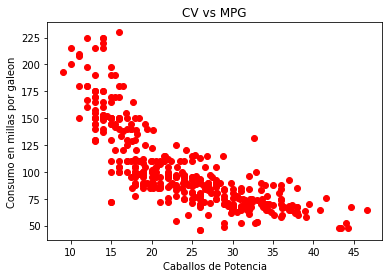

In [46]:
data_auto["mpg"].dropna()
data_auto["horsepower"].dropna()
plt.plot(data_auto["mpg"],data_auto["horsepower"], "ro")
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo en millas por galeon")
plt.title("CV vs MPG")

## Modelo de regresion lineal

mpg = a + b * horsepower

In [47]:
x = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

In [48]:
lm= LinearRegression()

In [49]:
lm.fit(x[:,np.newaxis],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

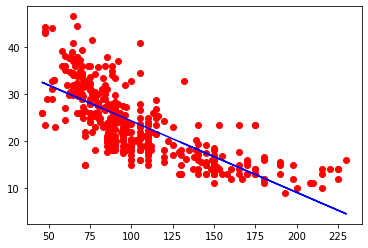

In [51]:
plt.plot(x,y,"ro")
plt.plot(x,lm.predict(x[:,np.newaxis]),"blue")

In [52]:
x_data = x[:,np.newaxis]

In [53]:
lm.score(x_data,y)

0.574653340645025

In [64]:
SSD = np.sum((y-lm.predict(x_data))**2)

In [65]:
RSE = np.sqrt(SSD/(len(data_auto)-1))

In [66]:
y_mean = np.mean(y)

In [67]:
error = RSE/y_mean
error

0.21462773361633458

## Modelo de regresion cuadratico

mpg = a + b * horsepower2

In [69]:
x_data = x**2
x_data = x_data[:,np.newaxis]

In [70]:
lm= LinearRegression()
lm.fit(x_data,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
lm.score(x_data,y)

0.4849887034823205

In [72]:
SSD = np.sum((y-lm.predict(x_data))**2)

In [73]:
RSE = np.sqrt(SSD/(len(data_auto)-1))

In [74]:
y_mean = np.mean(y)

In [75]:
error = RSE/y_mean
error

0.236168898529981

# Modelo de regresion lineal y cuadratico

mpg = a + b * horsepower + c * horsepower **2

In [78]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [79]:
poly = PolynomialFeatures(degree = 2)

In [80]:
x_data = poly.fit_transform(x[:,np.newaxis])

In [82]:
lm = linear_model.LinearRegression()
lm.fit(x_data,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
lm.score(x_data,y)

0.6439066584257469

In [84]:
lm.intercept_

55.02619244708123

In [85]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.02619244708123 -0.43404318 * hpw + 0.00112615 * hpw**2

In [88]:
for d in range(2,6):
    poly = PolynomialFeatures(degree = d)
    x_data = poly.fit_transform(x[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(x_data,y)
    print(lm.score(x_data,y))
    print(lm.intercept_)
    print(lm.coef_)
    

0.6439066584257469
55.02619244708123
[ 0.         -0.43404318  0.00112615]
0.6444678885560742
58.448774111672364
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
0.6467674189704503
40.09664386273736
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
0.6547512491826567
-40.69399205479398
[ 0.00000000e+00  4.00021890e+00 -7.54802463e-02  6.19621638e-04
 -2.36220983e-06  3.41983064e-09]


## El problema de los outliers

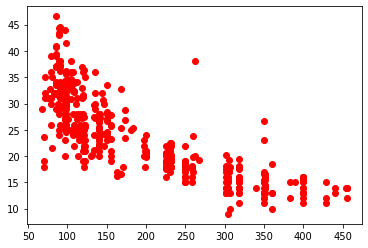

In [92]:
plt.plot(data_auto["displacement"],data_auto["mpg"],"ro")

In [94]:
x = data_auto["displacement"].fillna(data_auto["displacement"].mean())
x = x[:,np.newaxis]
y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
lm.score(x,y)

0.6261049762826918

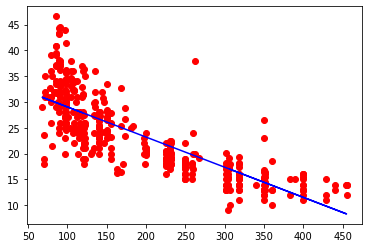

In [97]:
plt.plot(data_auto["displacement"],data_auto["mpg"],"ro")
plt.plot(data_auto["displacement"],lm.predict(x), "blue")

In [102]:
data_auto[(data_auto["displacement"]>250) & (data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [103]:
data_auto[(data_auto["displacement"]>300) & (data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [104]:
data_auto_clean = data_auto.drop([395,258,305,372])

In [105]:
x = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
x = x[:,np.newaxis]
y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
lm.score(x,y)

0.6466514317531822

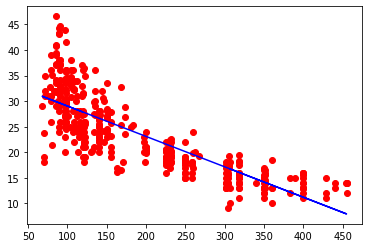

In [107]:
plt.plot(data_auto_clean["displacement"],data_auto_clean["mpg"],"ro")
plt.plot(data_auto_clean["displacement"],lm.predict(x), "blue")